In [1]:
import pandas as pd

datos = pd.read_csv("../U4_01_housing.csv")

In [2]:
datos["pop_per_household"] = datos["population"] / datos["households"]

In [3]:
datos.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,pop_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,2.181467


In [5]:
x = datos.loc[:, ["latitude", "longitude", "pop_per_household"]]

In [6]:
from sklearn.cluster import KMeans

modelo = KMeans(n_clusters=8)

predicciones = modelo.fit_predict(x)



In [15]:
x["pph_mean"] = predicciones

In [16]:
x.head()

,latitude,longitude,pop_per_household,pph_mean
0,37.88,-122.23,2.555556,3
1,37.86,-122.22,2.109842,3
2,37.85,-122.24,2.802260,3
3,37.85,-122.25,2.547945,3
4,37.85,-122.25,2.181467,3


In [17]:
x["pph_mean"].value_counts()

pph_mean
4    8428
3    8261
0    3942
7       5
1       1
5       1
6       1
2       1
Name: count, dtype: int64

<Axes: xlabel='latitude', ylabel='longitude'>

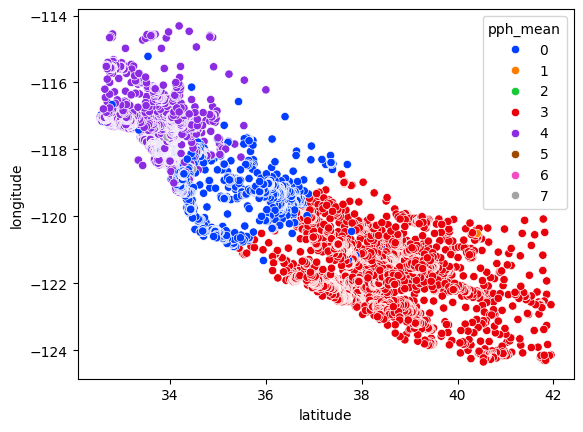

In [19]:
import seaborn as sb

sb.scatterplot(x="latitude", y="longitude", data=x, hue="pph_mean", palette="bright")

<Axes: xlabel='pph_mean', ylabel='count'>

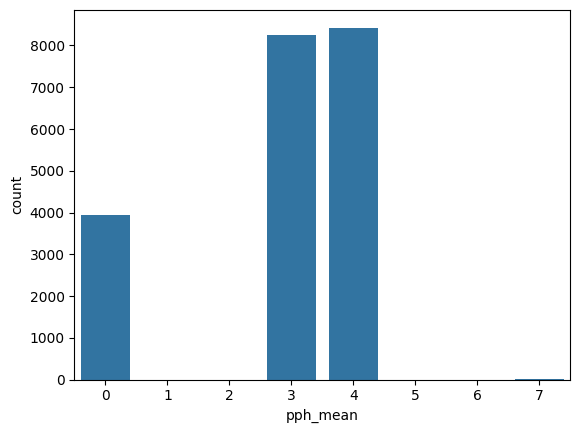

In [20]:
sb.countplot(x=x["pph_mean"], data=x)